In [1]:
cd("C:\\Users\\matsuno\\Desktop\\data_analysis\\HMMBase.jl\\src")
include(".//HMMBase.jl")
using .HMMBase

using Distributions
using Random
using PyPlot

In [2]:
function getnotnothing(x::AbstractArray)
    x[.!any.(isnothing, eachrow(x)), :]
end

getnotnothing (generic function with 1 method)

In [3]:
a = [0.2, 0.8]
A = [0.9 0.1; 0.1 0.9]
B = [Normal(1, 1.5), Normal(10, 3)]
hmm = HMM(a, A, B)

HMM{Univariate,Float64}([0.2, 0.8], [0.9 0.1; 0.1 0.9], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=1.0, σ=1.5), Normal{Float64}(μ=10.0, σ=3.0)])

rand(hmm::AbstractHMM, T::Integer, N::Integer)

In [4]:
Random.seed!(1234)
z, y = rand(hmm, 500, 2, seq = true)
size(z)

(500, 2)

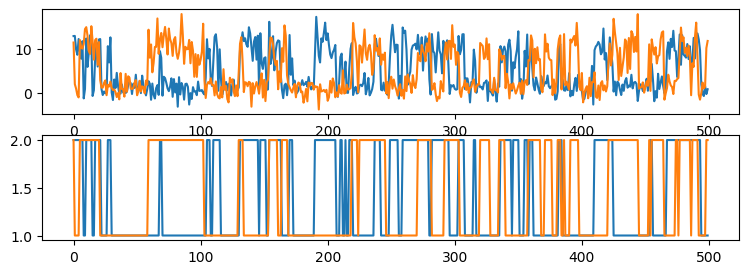

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062232588>
 PyObject <matplotlib.lines.Line2D object at 0x0000000062232AC8>

In [5]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = "-")

In [6]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((500, 2, 2), (500, 2, 2), (500, 2, 2))

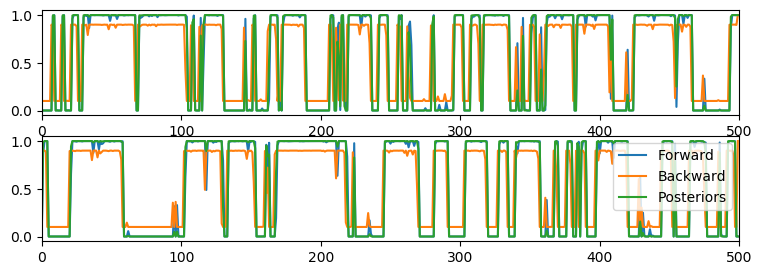

PyObject <matplotlib.legend.Legend object at 0x00000000625ED550>

In [7]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

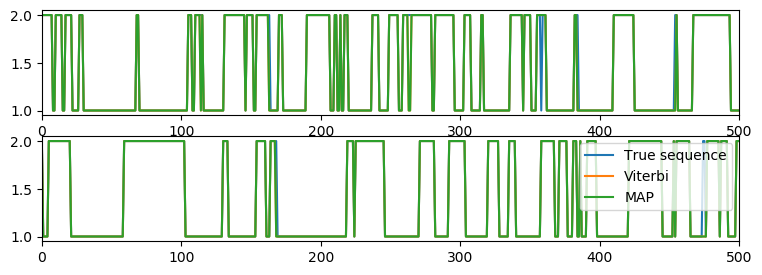

PyObject <matplotlib.legend.Legend object at 0x00000000627617B8>

In [8]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [9]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 10 iterations, logtot = -2422.7393405745415


(HMM{Univariate,Float64}([1.1171622221195691e-91, 1.0], [0.9214504471158976 0.07854955288410238; 0.10398950174890784 0.8960104982510921], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=1.1458727493396232, σ=1.5482004023962919), Normal{Float64}(μ=10.008769036808852, σ=2.841839655458468)]), Main.HMMBase.EMHistory(true, 10, [-2423.0174226347567, -2422.4482521027016, -2422.5810762825126, -2422.6674313505005, -2422.7087761011885, -2422.726803768056, -2422.734381285816, -2422.737519109158, -2422.738810475745, -2422.7393405745415]))

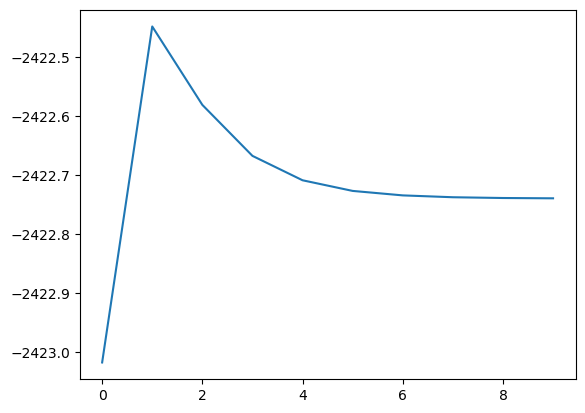

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000061F8BA90>

In [10]:
plot(history.logtots)

rand(hmm::AbstractHMM, d::Distribution{Univariate,Discrete}, N::Integer))

In [11]:
Random.seed!(1234)
z, y = rand(hmm, Poisson(1000), 2, seq = true)

(Union{Nothing, Int64}[2 2; 2 2; … ; 2 nothing; 2 nothing], Union{Nothing, Float64}[12.46525896704307 11.056202737839747; 11.522938951033227 11.262429981417036; … ; 5.889446710755492 nothing; 13.96941138792374 nothing])

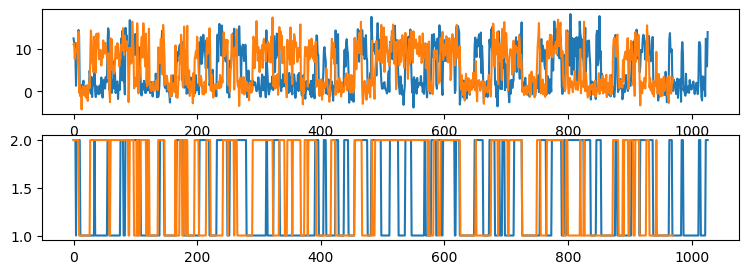

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000061FD9E10>
 PyObject <matplotlib.lines.Line2D object at 0x0000000062007390>

In [12]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = "-")

In [13]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((1027, 2, 2), (1027, 2, 2), (1027, 2, 2))

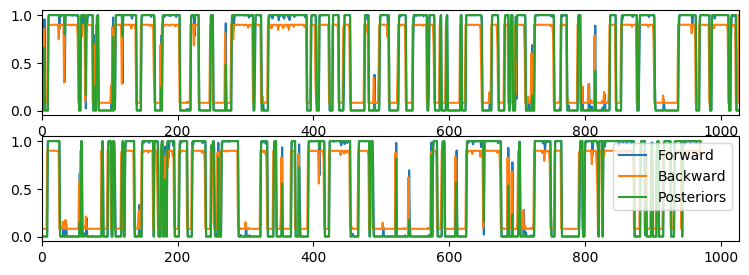

PyObject <matplotlib.legend.Legend object at 0x00000000620FE470>

In [14]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

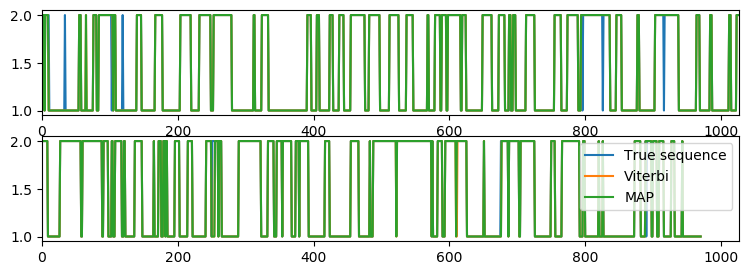

PyObject <matplotlib.legend.Legend object at 0x0000000062804940>

In [15]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [16]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 15 iterations, logtot = -4851.977706294894


(HMM{Univariate,Float64}([1.0, 6.674442998393433e-23], [0.9062441499447953 0.09375585005520475; 0.0935512535123987 0.9064487464876013], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=10.047201465797349, σ=2.8219636289087786), Normal{Float64}(μ=1.1182269288303484, σ=1.5911126781447023)]), Main.HMMBase.EMHistory(true, 15, [-6008.431046199837, -5790.422409783102, -5257.152045355849, -4928.9353367947015, -4899.386386643731, -4898.018460757626, -4898.029489259083, -4898.0883457692635, -4898.11576864824, -4898.126307505317, -4898.130150648924, -4879.162203416355, -4851.989827336753, -4851.977670528421, -4851.977706294894]))

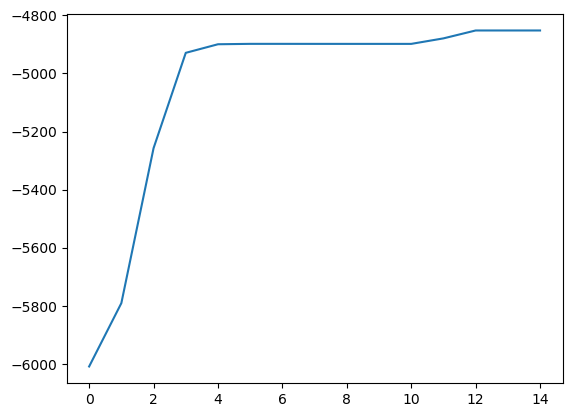

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000062883588>

In [17]:
plot(history.logtots)

In [116]:
a = [0.6, 0.4]
A = [0.9 0.1; 0.1 0.9]
B = [MvNormal([0.0, 5.0], ones(2) * 1), MvNormal([0.0, 5.0], ones(2) * 3)]
hmm = HMM(a, A, B)

HMM{Multivariate,Float64}([0.6, 0.4], [0.9 0.1; 0.1 0.9], Distribution{Multivariate,S} where S<:ValueSupport[DiagNormal(
dim: 2
μ: [0.0, 5.0]
Σ: [1.0 0.0; 0.0 1.0]
)
, DiagNormal(
dim: 2
μ: [0.0, 5.0]
Σ: [9.0 0.0; 0.0 9.0]
)
])

In [117]:
Random.seed!(1234)
z, y = rand(hmm, 500, 2, seq = true)

([1 2; 1 1; … ; 1 2; 1 2], [0.9413690740610126 5.9524068764564255; -0.06534960476567893 4.529644726446353; … ; -0.006926297128018101 5.263201248438593; 0.03757024343047003 5.571224573070708]

[-2.8616272203765103 4.029371888424804; 0.9964835000749546 5.0148326419833715; … ; -2.6396511879298004 5.770945228027628; 1.0489413823183906 2.1698641076118768])

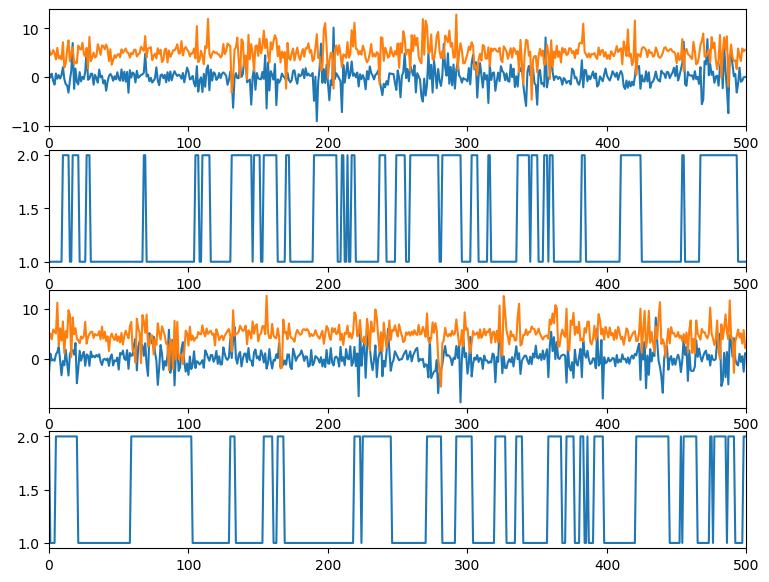

In [118]:
_, axes = subplots(nrows = 4, figsize = (9, 7))
axes[1].plot(y[:, :, 1])
axes[2].plot(z[:, 1], linestyle = "-")
axes[3].plot(y[:, :, 2])
axes[4].plot(z[:, 2], linestyle = "-")
for i in 1:4
    axes[i].set_xlim(0, size(y, 1))
end

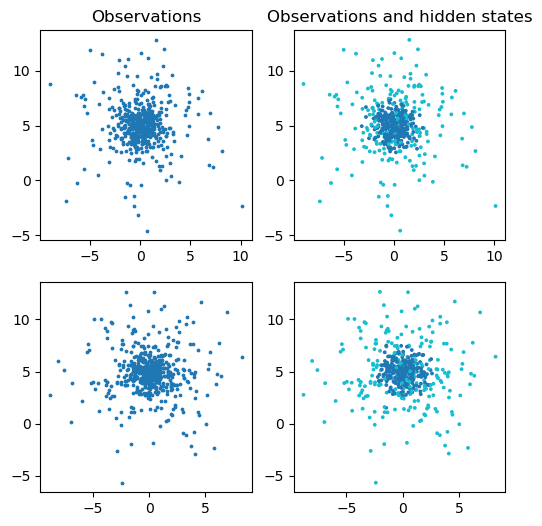

PyObject Text(0.5, 1, 'Observations and hidden states')

In [120]:
_, axes = subplots(nrows = 2, ncols = 2, figsize = (6, 6))
axes[1, 1].scatter(y[:, 1, 1], y[:, 2, 1], s = 3.0)
axes[1, 2].scatter(y[:, 1, 1], y[:, 2, 1], s = 3.0, c = z[:, 1], cmap = "tab10")
axes[2, 1].scatter(y[:, 1, 2], y[:, 2, 2], s = 3.0)
axes[2, 2].scatter(y[:, 1, 2], y[:, 2, 2], s = 3.0, c = z[:, 2], cmap = "tab10")
axes[1, 1].set_title("Observations")
axes[1, 2].set_title("Observations and hidden states")

In [121]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((500, 2, 2), (500, 2, 2), (500, 2, 2))

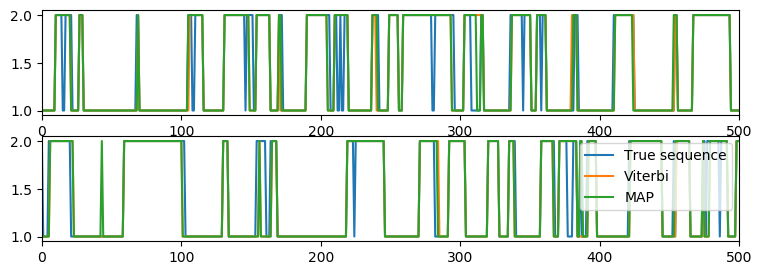

PyObject <matplotlib.legend.Legend object at 0x000000006385C8D0>

In [122]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [79]:
hmm, hist = fit_mle(hmm, y, display = :iter, init = :kmeans)
hmm

BoundsError: BoundsError: attempt to access 500×2 Array{Union{Nothing, Int64},2} at index [1:1000, 1]